In [1]:
!pip install tensorflow --upgrade

     |████████████████████████████████| 578.1 MB 40 kB/s /s eta 0:00:01 0:00:44    |██████████▍                     | 188.3 MB 9.9 MB/s eta 0:00:40    |██████████▊                     | 194.6 MB 9.9 MB/s eta 0:00:399.0 MB/s eta 0:00:04��███████████████▏        | 417.7 MB 116.2 MB/s eta 0:00:02��██▎     | 474.1 MB 75.3 MB/s eta 0:00:02��██▊     | 482.3 MB 75.3 MB/s eta 0:00:02��█████████████▎    | 492.2 MB 75.3 MB/s eta 0:00:02��██████████████    | 505.2 MB 75.3 MB/s eta 0:00:01    |████████████████████████████▉   | 521.7 MB 107.6 MB/s eta 0:00:01�████████████████▎| 566.0 MB 107.6 MB/s eta 0:00:01
     |████████████████████████████████| 124 kB 94.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 33.8 MB/s eta 0:00:01
     |████████████████████████████████| 438 kB 108.0 MB/s eta 0:00:01
     |████████████████████████████████| 14.1 MB 103.2 MB/s eta 0:00:01
     |████████████████████████████████| 5.9 MB 96.5 MB/s eta 0:00:016.5 MB/s eta 0:00:01
  Attempting uninstall: absl

    Uninstalling tensorflow-2.7.2:
      Successfully uninstalled tensorflow-2.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.7.3 requires tensorflow<2.8,>=2.7.0, but you have tensorflow 2.10.0 which is incompatible.
tensorflow-metadata 1.5.0 requires absl-py<0.13,>=0.9, but you have absl-py 1.3.0 which is incompatible.
autoai-ts-libs 1.1.9 requires tensorflow<2.8,>=2.7.0; python_version >= "3.9", but you have tensorflow 2.10.0 which is incompatible.


In [2]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from tensorflow.keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

2022-11-07 10:30:42.206220: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-07 10:30:42.234466: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-07 10:30:42.832422: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-07 10:30:42.832586: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could 

In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')
number_of_classes = 10  #storing the no of classes in a variable
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
#create model
model=Sequential ()

2022-11-07 10:30:45.057793: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-07 10:30:45.057844: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [6]:
#flatten the dimension of the image
model.add(Flatten())

In [7]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

In [8]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [9]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [10]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 182s 97ms/step - loss: 0.2493 - accuracy: 0.9509 - val_loss: 0.0870 - val_accuracy: 0.9761
Epoch 2/5
1875/1875 [==============================] - 181s 96ms/step - loss: 0.0726 - accuracy: 0.9776 - val_loss: 0.0791 - val_accuracy: 0.9762
Epoch 3/5
1875/1875 [==============================] - 182s 97ms/step - loss: 0.0504 - accuracy: 0.9847 - val_loss: 0.1039 - val_accuracy: 0.9699
Epoch 4/5
1875/1875 [==============================] - 181s 97ms/step - loss: 0.0400 - accuracy: 0.9870 - val_loss: 0.1075 - val_accuracy: 0.9737
Epoch 5/5
1875/1875 [==============================] - 182s 97ms/step - loss: 0.0328 - accuracy: 0.9895 - val_loss: 0.0992 - val_accuracy: 0.9753


In [11]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.09917986392974854, 0.9753000140190125]


In [12]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 73ms/step
[[6.9367101e-20 3.1749916e-16 3.9024136e-18 4.5320410e-12 5.2147720e-06
  3.7369080e-10 2.2305827e-15 6.8329959e-09 8.5164379e-07 9.9999392e-01]]


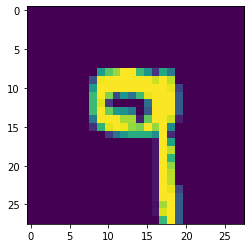

In [13]:
plt.imshow(x_test[6000])

In [14]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [15]:
# Save the model
model.save('models/mnistCNN.h5')

In [16]:
cd models

/home/wsuser/work/models


In [17]:
!tar -zcvf handwritten-digit-recognition-model_new.tgz mnistCNN.h5

mnistCNN.h5


In [18]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 20.6 MB/s eta 0:00:01


In [29]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com/",
    "apikey":"8BKrm20gZaiuw_W-xkRa6rxewkeIHzxeBFTcndisz1u_"
}
client = APIClient(credentials)
client

In [30]:
client.spaces.get_details()

{'resources': []}

In [37]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [52]:
space_uid = guid_from_space_name(client,'HWDR')
print("Space UID = " + space_uid)


Space UID = b72d239f-bee0-4243-9cc9-6f18f379c647


In [53]:
client.set.default_space(space_uid)

'SUCCESS'

In [54]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1

In [55]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [56]:
model_details = client.repository.store_model(model='handwritten-digit-recognition-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Digit recognition model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [57]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-07T11:02:39.324Z',
  'id': 'f195d8a3-1c50-4778-9e35-97ad7f613bc8',
  'modified_at': '2022-11-07T11:02:41.833Z',
  'name': 'CNN Digit recognition model',
  'owner': 'IBMid-665002MBIE',
  'resource_key': '42d5665e-a805-40c9-a463-61d8c7be72ea',
  'space_id': 'b72d239f-bee0-4243-9cc9-6f18f379c647'},
 'system': {'warnings': []}}

In [58]:
model_id = client.repository.get_model_id(model_details)
model_id

'f195d8a3-1c50-4778-9e35-97ad7f613bc8'

In [60]:
ls


DigitRecog_IBM_model.tar.gz                  mnistCNN.h5
handwritten-digit-recognition-model_new.tgz


In [61]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [62]:
model = load_model("mnistCNN.h5")

In [63]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/66d53aedc6cc4badb6f1420fc3e2c1f3:0692238e-3ff0-4e92-a820-f723f1e3b242::',
      'guid': '0692238e-3ff0-4e92-a820-f723f1e3b242',
      'name': 'Watson Machine Learning-hb',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'HWDR',
    'scope': {'bss_account_id': '66d53aedc6cc4badb6f1420fc3e2c1f3'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '3524bf6a-c3be-473a-b91f-6f8f65540ca4',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': '61ab5121d7a343d7b5c610d98d75ab7f',
        'api_key': 'cXC8CZ4Ivks2hZ9FMSE7NLK4IFln7a8kMkzq2hDoRtkv',
        'secret_access_key': '885b25e596c727c56b7ccec5c4c23709932d16161e1b105c',
        'service_id': 'ServiceId-e192bd63-409c-4bfe-832c-f61e7a9c0881'},
       'editor': {'access_key_id': '6ac55cdf48c74ed89dc96861405f010f',
        'api_key': 'VxUJ

In [64]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [67]:
space_uid = guid_from_space_name(client,'HWDR')
print("Space UID = " + space_uid)

Space UID = b72d239f-bee0-4243-9cc9-6f18f379c647


In [68]:
client.set.default_space(space_uid)

'SUCCESS'

In [69]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1

In [70]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [71]:
model_details = client.repository.store_model(model='handwritten-digit-recognition-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Digit recognition model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [72]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-07T11:03:33.361Z',
  'id': '91b983e2-80b1-4634-bd6f-7513a33a8681',
  'modified_at': '2022-11-07T11:03:35.467Z',
  'name': 'CNN Digit recognition model',
  'owner': 'IBMid-665002MBIE',
  'resource_key': 'd924726e-1528-4618-86ae-245ad8bd0ac2',
  'space_id': 'b72d239f-bee0-4243-9cc9-6f18f379c647'},
 'system': {'warnings': []}}

In [73]:
model_id = client.repository.get_model_id(model_details)
model_id

'91b983e2-80b1-4634-bd6f-7513a33a8681'

In [75]:
ls

DigitRecog_IBM_model.tar.gz                  mnistCNN.h5
handwritten-digit-recognition-model_new.tgz


In [76]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [77]:
model = load_model("mnistCNN.h5")